# EDA

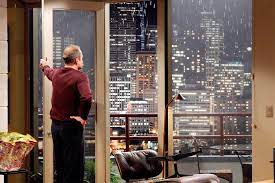

## Exploratory data analysis for the house market in King County

for client William Rodriguez

Client briefing:
- Home Buyers
- Interest: Understanding the factors that influence house prices and how they can get better value for their money.
- Focus: Price trends, key features affecting price, and neighborhood insights.

## Preparations

In [1]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import folium as fol
#import nbimporter
#import my_functions

from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
# Importing the data
df_houses = pd.read_csv("eda.csv")

## Data Cleaning

Steps of the Data Cleaning Process:
1. Deleting duplicated and not needed columns
2. Renaming columns
3. Adding further columns needed
4. Ordering columns
5. Converting the values in the columns to the right data types & filling missing data

# Learnings
- There are duplicated house_ids because some of the houses were sold multiple times.
- No rows are duplicated in the data.

In [3]:
# 1. Deleting the duplicated house_id column
df_houses.drop(["house_id"], axis=1, inplace=True) 

In [4]:
# 2. Renaming the columns:
df_houses = df_houses.rename({'id':'house_id', 'date': 'date_sold', 'id.1': 'sale_id'},axis=1)
df_houses.head(1)

,house_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_sold,price,sale_id
0,7129300520,3.000,1.000,1180.000,5650.000,1.000,NaN,0.000,3,7,...,1955,0.000,98178,47.511,-122.257,1340.000,5650.000,2014-10-13,221900.000,1


In [5]:
# Counting repetitions of `house_id` (= number of selling processes)
house_id_counts = df_houses['house_id'].value_counts().reset_index()
house_id_counts.columns = ['house_id', 'number_sold']

# Counting `house_id`s in every category
count_of_counts = house_id_counts['number_sold'].value_counts().reset_index()
count_of_counts.columns = ['number_sold', 'number_of_ids']

print(count_of_counts)

   number_sold  number_of_ids
0            1          21244
1            2            175
2            3              1


In [6]:
df_houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   house_id       21597 non-null  int64  
 1   bedrooms       21597 non-null  float64
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  float64
 4   sqft_lot       21597 non-null  float64
 5   floors         21597 non-null  float64
 6   waterfront     19206 non-null  float64
 7   view           21534 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  float64
 11  sqft_basement  21145 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17749 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  float64
 18  sqft_l

In [7]:

# waterfront: [nan,  0.,  1.] --> replacing nan with 0:
df_houses["waterfront"].fillna(0, inplace=True)
# Converting the 'waterfront' column to int:
df_houses['waterfront'] = df_houses['waterfront'].astype(int)
# view: [nan,  0.,  1-4.] --> replacing nan with 0:
df_houses["view"].fillna(0, inplace=True)


In [8]:
# 3. Adding further columns needed
#   Adding 'renovated'
df_houses['renovated'] = df_houses['yr_renovated'].apply(lambda x: 1 if pd.notna(x) else 0)

#   Adding 'renovated_last_5_yrs' (tbd or grouping!)
# df_houses['renovated_last_5_yrs'] = df_houses.apply(lambda row: 1 if pd.notna(row['yr_renovated']) and (row['date_sold'].year - row['yr_renovated'] <= 5) else 0, axis=1)
df_houses.sort_values(by="yr_renovated", ascending=False)

# Adding the price_per_sqft
df_houses['price_per_sqft'] = (df_houses['price'] / (df_houses['sqft_living'] + df_houses['sqft_lot'])).round(2)

df_houses.head(2)

,house_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode,lat,long,sqft_living15,sqft_lot15,date_sold,price,sale_id,renovated,price_per_sqft
0,7129300520,3.000,1.000,1180.000,5650.000,1.000,0,0.000,3,7,...,98178,47.511,-122.257,1340.000,5650.000,2014-10-13,221900.000,1,1,32.490
1,6414100192,3.000,2.250,2570.000,7242.000,2.000,0,0.000,3,7,...,98125,47.721,-122.319,1690.000,7639.000,2014-12-09,538000.000,2,1,54.830


In [9]:
df_houses.isnull().sum()

house_id             0
bedrooms             0
bathrooms            0
sqft_living          0
sqft_lot             0
floors               0
waterfront           0
view                 0
condition            0
grade                0
sqft_above           0
sqft_basement      452
yr_built             0
yr_renovated      3848
zipcode              0
lat                  0
long                 0
sqft_living15        0
sqft_lot15           0
date_sold            0
price                0
sale_id              0
renovated            0
price_per_sqft       0
dtype: int64

In [10]:
# 4. Ordering columns
desired_order = ['price', 'price_per_sqft', 'date_sold', 'yr_built', 'yr_renovated', 'renovated', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'zipcode', 'lat', 'long', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'house_id', 'sale_id']
df_houses = df_houses[desired_order]
df_houses.head(1)

,price,price_per_sqft,date_sold,yr_built,yr_renovated,renovated,bedrooms,bathrooms,floors,waterfront,...,grade,zipcode,lat,long,sqft_living,sqft_lot,sqft_above,sqft_basement,house_id,sale_id
0,221900.000,32.490,2014-10-13,1955,0.000,1,3.000,1.000,1.000,0,...,7,98178,47.511,-122.257,1180.000,5650.000,1180.000,0.000,7129300520,1


In [11]:
# 5. Converting the values in the columns to the right data types & filling missing data

# yr_renovated: --> replacing 0 with nan:
df_houses["yr_renovated"].replace(0, np.nan, inplace=True)

# Function to delete 0 at the end of the year in the yr_renovated column
def remove_zeros(year):
    if pd.notna(year) and len(str(int(year))) == 5 and str(year).endswith('0'):
        return int(str(int(year))[:-1])
    return year

#  Removing zeros for 'yr_renovated' (year was displayed as e.g. 19500)
df_houses['yr_renovated'] = df_houses['yr_renovated'].apply(remove_zeros)

# converting into dates: yr_built, yr_renovated, date_sold
df_houses['yr_built'] = pd.to_datetime(df_houses['yr_built'], format='%Y').dt.year
df_houses['yr_renovated'] = pd.to_datetime(df_houses['yr_renovated'], format='%Y', errors='coerce').dt.year
df_houses['date_sold'] = pd.to_datetime(df_houses['date_sold'])

# Ergebnis anzeigen
df_houses.head()

,price,price_per_sqft,date_sold,yr_built,yr_renovated,renovated,bedrooms,bathrooms,floors,waterfront,...,grade,zipcode,lat,long,sqft_living,sqft_lot,sqft_above,sqft_basement,house_id,sale_id
0,221900.000,32.490,2014-10-13,1955,NaN,1,3.000,1.000,1.000,0,...,7,98178,47.511,-122.257,1180.000,5650.000,1180.000,0.000,7129300520,1
1,538000.000,54.830,2014-12-09,1951,1991.000,1,3.000,2.250,2.000,0,...,7,98125,47.721,-122.319,2570.000,7242.000,2170.000,400.000,6414100192,2
2,180000.000,16.710,2015-02-25,1933,NaN,0,2.000,1.000,1.000,0,...,6,98028,47.738,-122.233,770.000,10000.000,770.000,0.000,5631500400,3
3,604000.000,86.780,2014-12-09,1965,NaN,1,4.000,3.000,1.000,0,...,7,98136,47.521,-122.393,1960.000,5000.000,1050.000,910.000,2487200875,4
4,510000.000,52.250,2015-02-18,1987,NaN,1,3.000,2.000,1.000,0,...,8,98074,47.617,-122.045,1680.000,8080.000,1680.000,0.000,1954400510,5


In [12]:
df_houses.describe()

,price,price_per_sqft,date_sold,yr_built,yr_renovated,renovated,bedrooms,bathrooms,floors,waterfront,...,grade,zipcode,lat,long,sqft_living,sqft_lot,sqft_above,sqft_basement,house_id,sale_id
count,21597.000,21597.000,21597,21597.000,744.000,21597.000,21597.000,21597.000,21597.000,21597.000,...,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21145.000,21597.000,21597.000
mean,540296.574,59.730,2014-10-29 04:20:38.171968512,1971.000,1995.929,0.822,3.373,2.116,1.494,0.007,...,7.658,98077.952,47.560,-122.214,2080.322,15099.409,1788.597,291.857,4580474287.771,10799.000
min,78000.000,0.160,2014-05-02 00:00:00,1900.000,1934.000,0.000,1.000,0.500,1.000,0.000,...,3.000,98001.000,47.156,-122.519,370.000,520.000,370.000,0.000,1000102.000,1.000
25%,322000.000,28.140,2014-07-22 00:00:00,1951.000,1987.000,1.000,3.000,1.750,1.000,0.000,...,7.000,98033.000,47.471,-122.328,1430.000,5040.000,1190.000,0.000,2123049175.000,5400.000
50%,450000.000,46.880,2014-10-16 00:00:00,1975.000,2000.000,1.000,3.000,2.250,1.500,0.000,...,7.000,98065.000,47.572,-122.231,1910.000,7618.000,1560.000,0.000,3904930410.000,10799.000
75%,645000.000,78.050,2015-02-17 00:00:00,1997.000,2007.250,1.000,4.000,2.500,2.000,0.000,...,8.000,98118.000,47.678,-122.125,2550.000,10685.000,2210.000,560.000,7308900490.000,16198.000
max,7700000.000,399.480,2015-05-27 00:00:00,2015.000,2015.000,1.000,33.000,8.000,3.500,1.000,...,13.000,98199.000,47.778,-121.315,13540.000,1651359.000,9410.000,4820.000,9900000190.000,21597.000
std,367368.140,45.617,NaN,29.375,15.600,0.383,0.926,0.769,0.540,0.082,...,1.173,53.513,0.139,0.141,918.106,41412.637,827.760,442.491,2876735715.748,6234.661


## General Overview over the data

Getting a first impression on potential interdependencies

In [13]:
# correlation matrix between the variables
corr_columns=["floors", "waterfront", "view", "condition", "grade", "zipcode", "price", "price_per_sqft"]
corr_mtrx=df_houses[corr_columns].corr()
corr_mtrx

,floors,waterfront,view,condition,grade,zipcode,price,price_per_sqft
floors,1.000,0.021,0.028,-0.264,0.459,-0.060,0.257,0.433
waterfront,0.021,1.000,0.381,0.017,0.083,0.029,0.264,0.054
view,0.028,0.381,1.000,0.046,0.249,0.085,0.393,0.122
condition,-0.264,0.017,0.046,1.000,-0.147,0.003,0.036,-0.048
grade,0.459,0.083,0.249,-0.147,1.000,-0.186,0.668,0.244
zipcode,-0.060,0.029,0.085,0.003,-0.186,1.000,-0.053,0.245
price,0.257,0.264,0.393,0.036,0.668,-0.053,1.000,0.421
price_per_sqft,0.433,0.054,0.122,-0.048,0.244,0.245,0.421,1.000


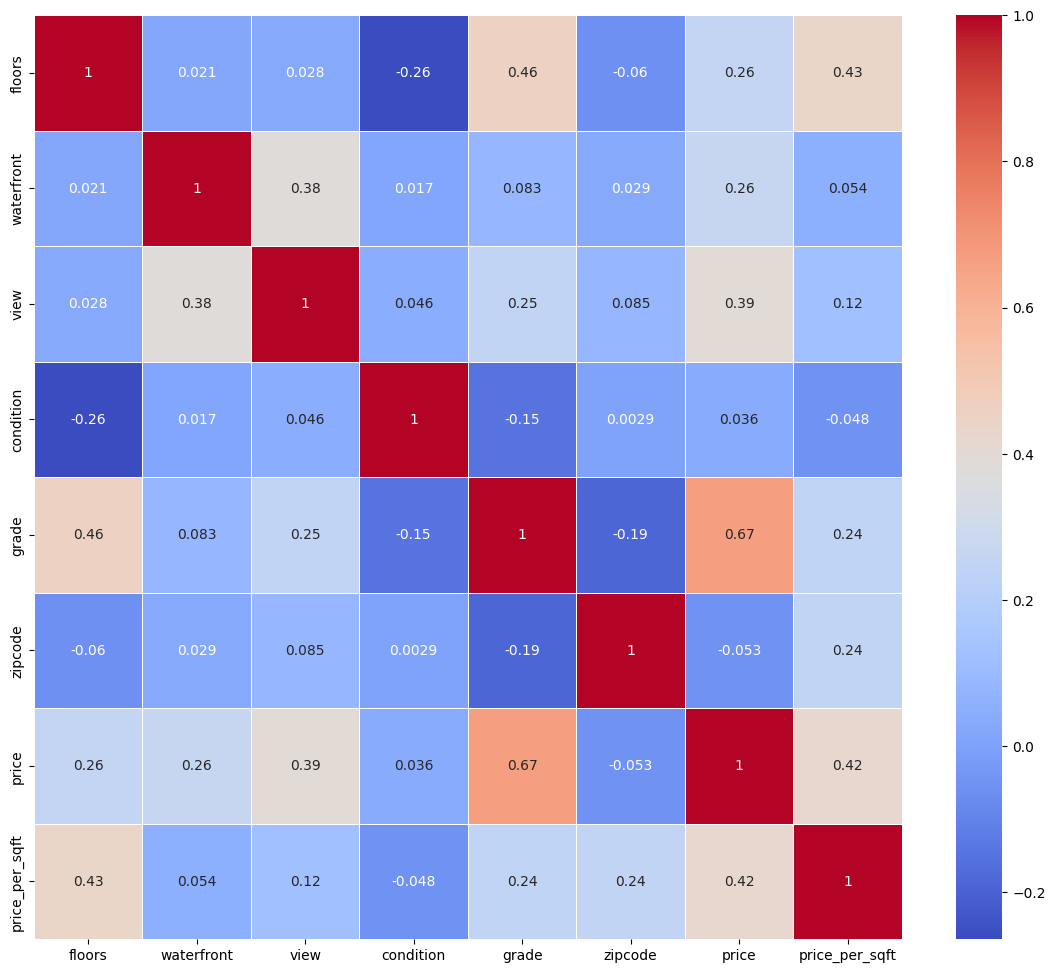

In [14]:
# drawing a heatmap 
plt.figure(figsize = (14,12))
ax = sns.heatmap(corr_mtrx, linewidths=.5, annot=True, cmap='coolwarm')

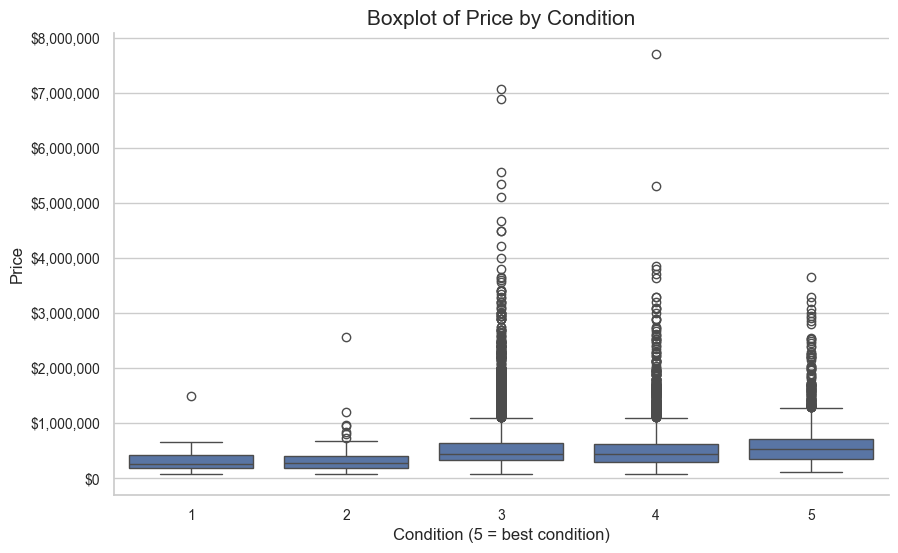

In [15]:
# Boxplot of Price by Condition
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

sns.boxplot(x='condition', y='price', data=df_houses)

# Font and axes
plt.xlabel('Condition (5 = best condition)', fontsize=12, fontname='Arial')
plt.ylabel('Price', fontsize=12, fontname='Arial')
plt.title('Boxplot of Price by Condition', fontsize=15, fontname='Arial')
plt.xticks(fontsize=10, fontname='Arial')
plt.yticks(fontsize=10, fontname='Arial')

# Remove the edges of the entire graphic on the right and at the top
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# Y axis format
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))

plt.show()

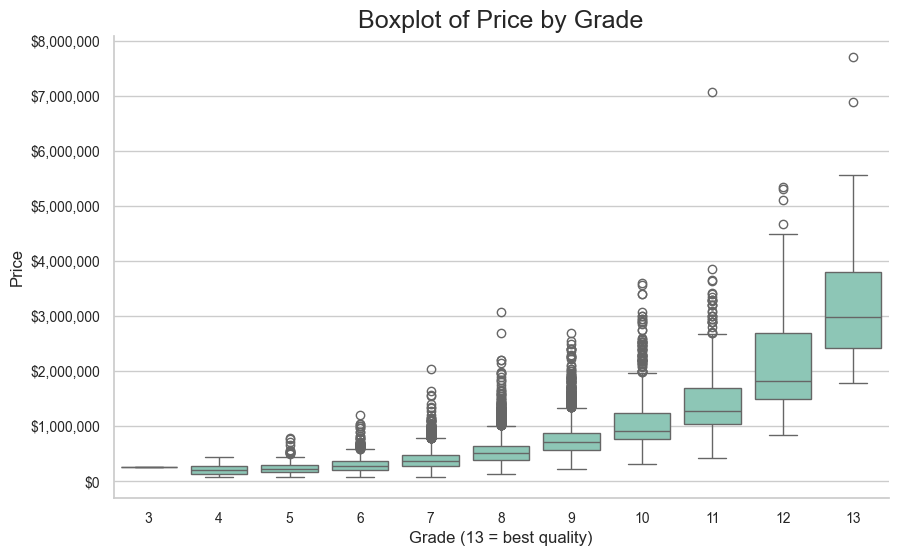

In [123]:
# Creating a boxplot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

sns.boxplot(x='grade', y='price', data=df_houses, color='#84cfba')

# Font and axes
plt.xlabel('Grade (13 = best quality)', fontsize=12, fontname='Arial')
plt.ylabel('Price', fontsize=12, fontname='Arial')
plt.title('Boxplot of Price by Grade', fontsize=18, fontname='Arial')
plt.xticks(fontsize=10, fontname='Arial')
plt.yticks(fontsize=10, fontname='Arial')

# Remove the edges of the entire graphic on the right and at the top
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# Y axis format
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))

plt.show()

In [152]:
# Filter only 3-bedroom houses
df_3_bedrooms = df_houses[df_houses['bedrooms'] == 3]

# Calculate mean grade and mean price for 3-bedroom houses
mean_grade = df_3_bedrooms['grade'].mean()
mean_price = df_3_bedrooms['price'].mean()

print(mean_grade)
print(mean_price)

# Filter zip codes where grade > mean_grade and price < mean_price
df_value_filtered = df_3_bedrooms[(df_3_bedrooms['grade'] > mean_grade) & 
                            (df_3_bedrooms['price'] < mean_price)]

# Display the filtered DataFrame
df_value_filtered.head(3)


7.472516286644951
466276.59089983715


,price,price_per_sqft,date_sold,yr_built,yr_renovated,renovated,bedrooms,bathrooms,floors,waterfront,...,lat,long,sqft_living,sqft_lot,sqft_above,sqft_basement,house_id,sale_id,season,category
24,329000.000,36.760,2014-11-20,1985,NaN,1,3.000,2.250,2.000,0,...,47.374,-122.173,2450.000,6500.000,2450.000,0.000,3814700200,25,Autumn,medium_old_houses
57,301000.000,41.980,2015-04-07,2003,NaN,1,3.000,2.500,2.000,0,...,47.366,-122.122,2420.000,4750.000,2420.000,0.000,2799800710,58,Spring,new_houses
80,390000.000,52.350,2014-12-02,2003,NaN,1,3.000,2.500,2.000,0,...,47.351,-122.008,2350.000,5100.000,2350.000,0.000,5104520400,81,Winter,new_houses


In [125]:
# Group by zipcode: count number of houses sold and calculate mean price
houses_sold_per_zipcode = df_value_filtered.groupby('zipcode').agg(
    number_houses_sold=('zipcode', 'count'),  # Count houses sold
    price_mean=('price', 'mean'),  # Calculate mean price
    lat_mean=('lat', 'mean'),  # Calculate mean latitude
    long_mean=('long', 'mean')  # Calculate mean longitude
).reset_index()

# Filter zip codes with more than 20 houses sold
houses_sold_per_zipcode = houses_sold_per_zipcode[houses_sold_per_zipcode['number_houses_sold'] >= 20]

# Sort by number of houses sold in descending order
houses_sold_per_zipcode = houses_sold_per_zipcode.sort_values(by='number_houses_sold', ascending=False).reset_index(drop=True)

# Display the result
houses_sold_per_zipcode.head(3)

,zipcode,number_houses_sold,price_mean,lat_mean,long_mean
0,98023,99,297624.162,47.308,-122.366
1,98042,72,355140.278,47.368,-122.129
2,98058,71,362426.169,47.446,-122.135


In [154]:
# Create the map, centered on the middle coordinates
m = fol.Map(location=[houses_sold_per_zipcode['lat_mean'].mean(), houses_sold_per_zipcode['long_mean'].mean()], zoom_start=12)

# Loop over the lines of the DataFrame to add markers
for _, row in houses_sold_per_zipcode.iterrows():
    fol.CircleMarker(
        location=[row['lat_mean'], row['long_mean']],
        radius=6,
        color='#1d8cbe',  # Edge color
        fill=True,
        fill_color='#1d8cbe',  # Fill color
        fill_opacity=0.6
    ).add_to(m)

    # Adding markers with price as a label
    fol.Marker(
        location=[row['lat_mean'], row['long_mean']],
        icon=fol.DivIcon(html=f'''
            <div style="font-size: 12px; color: black; font-weight: bold;
                position: absolute; left: 8px; top: -18px;">
                ${row['price_mean']:,.0f}
            </div>
        ''')
    ).add_to(m)

# Saving the map as HTML file
m.save("map_with_prices.html")

# Show map
m

## Checking the hypotheses
1. The house prices in summer are higher than in winter.
2. Renovated houses are more expensive.
3. If a house is located at the waterfront it is more expensive.

   season      price
0  Spring 552782.763
1  Summer 546719.464
2  Autumn 531276.475
3  Winter 519613.645


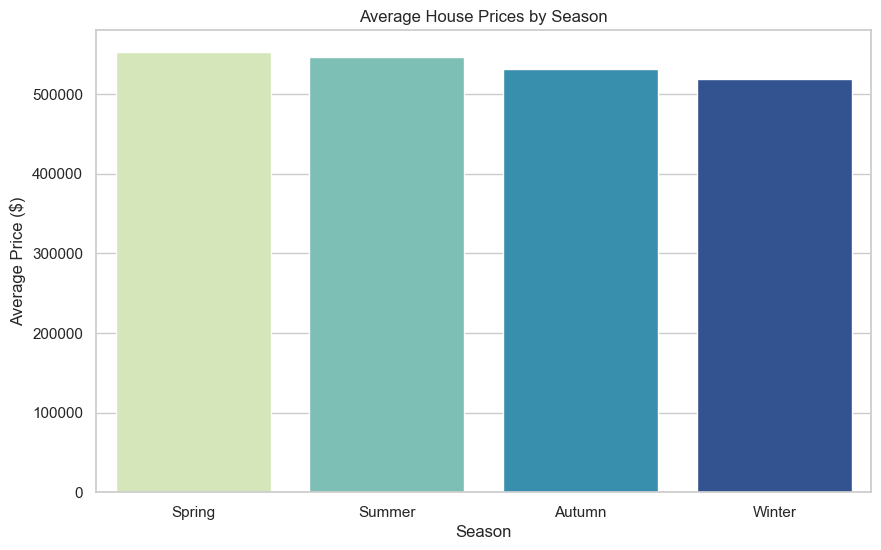

In [17]:
# Hypothesis 1: The house prices in summer are higher than in winter.
# Checking for price seasonality

# Function which takes a date and returns the season
def get_season(date):
    
    if date.month in [3, 4, 5]:
        return 'Spring'
    elif date.month in [6, 7, 8]:
        return 'Summer'
    if date.month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Winter'

# Adding the season to the dataframe
df_houses['season'] = df_houses['date_sold'].apply(get_season)

# Bringing the seasons in the right order
season_order = ['Spring', 'Summer', 'Autumn', 'Winter']
df_houses['season'] = pd.Categorical(df_houses['season'], categories=season_order, ordered=True)

# Calculating average prices per season
average_prices = df_houses.groupby('season')['price'].mean().reset_index()
print(average_prices)

# Creating a barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='price', data=average_prices, palette='YlGnBu')
plt.title('Average House Prices by Season')
plt.xlabel('Season')
plt.ylabel('Average Price ($)')
plt.show()

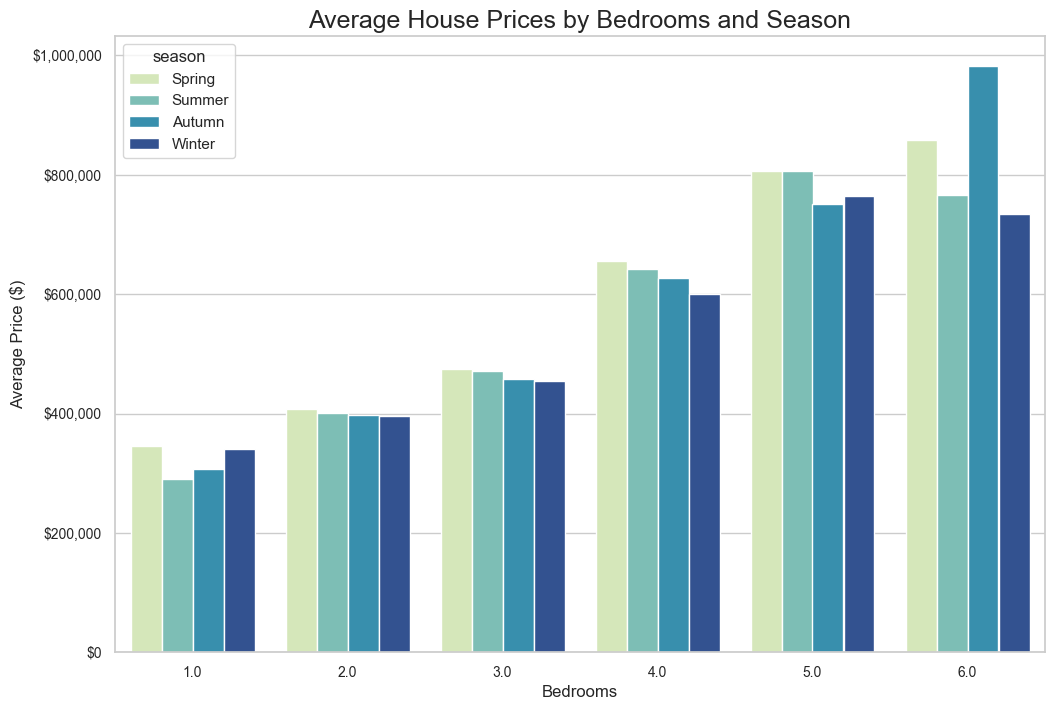

In [18]:
# Checking the hypothesis for different house sizes represented by the number of bedrooms
average_prices = df_houses.groupby(['bedrooms', 'season'])['price'].mean().reset_index()

# Filtering data for max 6 bedrooms
average_prices = average_prices[average_prices['bedrooms'] <= 6]

# Creating a grouped barplot
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

sns.barplot(x='bedrooms', y='price', hue='season', data=average_prices, palette='YlGnBu')

# Font and axes
plt.xlabel('Bedrooms', fontsize=12, fontname='Arial')
plt.ylabel('Average Price ($)', fontsize=12, fontname='Arial')
plt.title('Average House Prices by Bedrooms and Season', fontsize=18, fontname='Arial')
plt.xticks(fontsize=10, fontname='Arial')
plt.yticks(fontsize=10, fontname='Arial')

# Y axis formatting
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))

plt.show()

In [20]:
# Hypothesis 2: Renovated houses are more expensive.

# zip codes with renovated houses
zipcodes_with_renovated_houses = df_houses[df_houses['renovated'] == 1]['zipcode'].unique()

# Creating a new DataFrame which contains all zip codes from zipcodes_with_waterfront
df_filtered_renovation = df_houses[df_houses['zipcode'].isin(zipcodes_with_renovated_houses)]


In [24]:
# Counting the number of houses sold depending on the number of bedrooms
bedroom_counts = df_houses['bedrooms'].value_counts().reset_index()
bedroom_counts.columns = ['bedrooms', 'count']

# Ergebnis anzeigen
print(bedroom_counts)

    bedrooms  count
0      3.000   9824
1      4.000   6882
2      2.000   2760
3      5.000   1601
4      6.000    272
5      1.000    196
6      7.000     38
7      8.000     13
8      9.000      6
9     10.000      3
10    11.000      1
11    33.000      1


       yr_built  yr_renovated           category
0          1955           NaN         old_houses
1          1951      1991.000         old_houses
2          1933           NaN    very_old_houses
3          1965           NaN         old_houses
4          1987           NaN  medium_old_houses
...         ...           ...                ...
21592      2009           NaN         new_houses
21593      2014           NaN         new_houses
21594      2009           NaN         new_houses
21595      2004           NaN         new_houses
21596      2008           NaN         new_houses

[21597 rows x 3 columns]


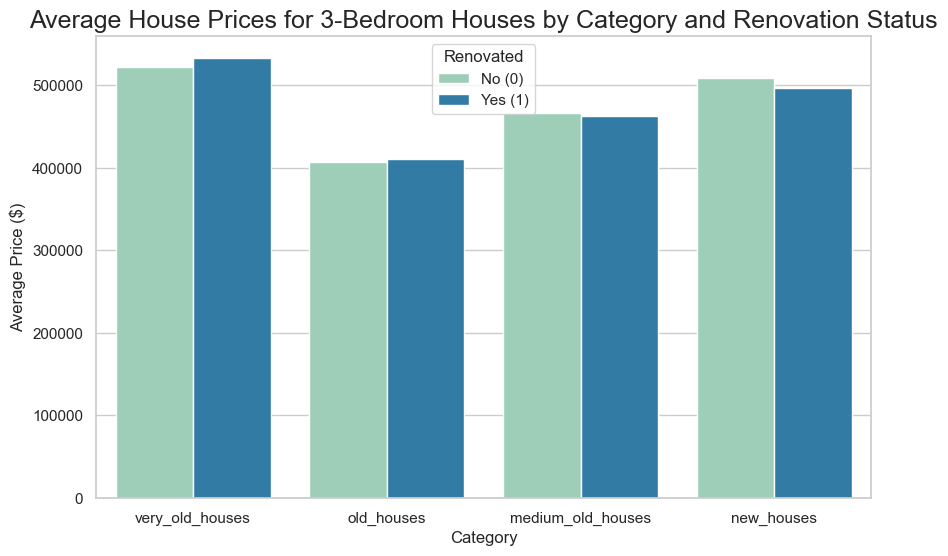

In [25]:
# Adding categories depending on the age of the house

def categorize_house(row):
    if row['yr_built'] >= 2000:
        return 'new_houses'
    elif 1975 <= row['yr_built'] <= 1999:
        return 'medium_old_houses'
    elif 1950 <= row['yr_built'] <= 1974:
        return 'old_houses'
    else:
        return 'very_old_houses'

df_houses['category'] = df_houses.apply(categorize_house, axis=1)

# Ergebnis anzeigen
print(df_houses[['yr_built', 'yr_renovated', 'category']])

# Filter data: Only houses with 3 bedrooms (as most of the houses sold are 3 bedroom houses)
df_3_bedrooms = df_houses[df_houses['bedrooms'] == 3]

# Compute average prices by category and renovation status
average_prices = df_3_bedrooms.groupby(['category', 'renovated'])['price'].mean().reset_index()

# Define the custom category order
category_order = ["very_old_houses", "old_houses", "medium_old_houses", "new_houses"]

# Create the plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

barplot = sns.barplot(
    data=average_prices, 
    x="category", 
    y="price", 
    hue="renovated",  # Group by renovation status
    dodge=True,
    order=category_order,  # Ensure correct category order on x-axis
    palette="YlGnBu"
)

# Set axis labels and title
plt.xlabel("Category")
plt.ylabel("Average Price ($)")
plt.title("Average House Prices for 3-Bedroom Houses by Category and Renovation Status", fontsize=18)

# Improve legend
handles, labels = barplot.get_legend_handles_labels()
plt.legend(handles=handles, title="Renovated", labels=["No (0)", "Yes (1)"])

# Show plot
plt.show()


In [27]:
# Counting the 
zipcode_counts = df_houses['zipcode'].value_counts().reset_index()
zipcode_counts.columns = ['zipcode', 'count']

# Ergebnis anzeigen
print(zipcode_counts)

    zipcode  count
0     98103    602
1     98038    589
2     98115    583
3     98052    574
4     98117    553
..      ...    ...
65    98102    104
66    98010    100
67    98024     80
68    98148     57
69    98039     50

[70 rows x 2 columns]


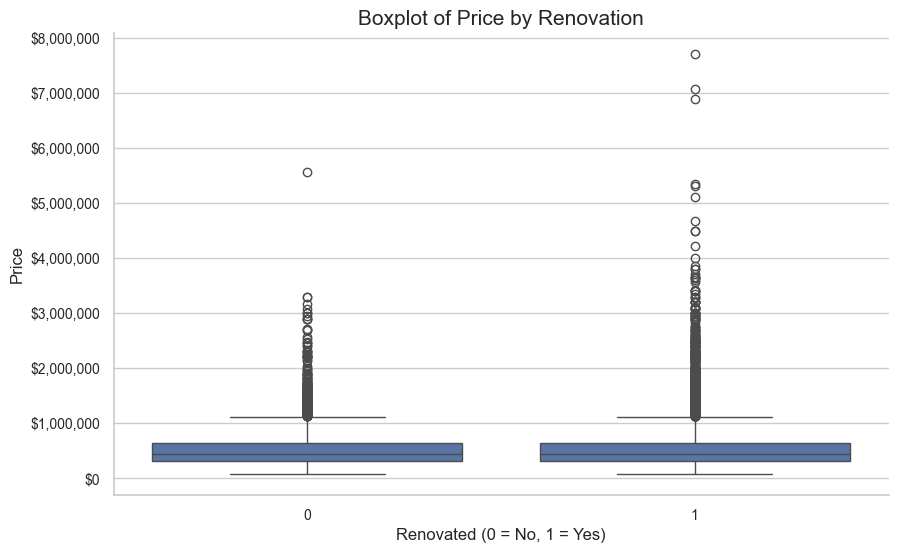

In [29]:
# Creating a boxplot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Boxplot mit angepassten Farben
sns.boxplot(x='renovated', y='price', data=df_filtered_renovation)

# Schriftart und Achsenanpassungen
plt.xlabel('Renovated (0 = No, 1 = Yes)', fontsize=12, fontname='Arial')
plt.ylabel('Price', fontsize=12, fontname='Arial')
plt.title('Boxplot of Price by Renovation', fontsize=15, fontname='Arial')
plt.xticks(fontsize=10, fontname='Arial')
plt.yticks(fontsize=10, fontname='Arial')

# Ränder der gesamten Grafik rechts und oben entfernen
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# Y-Achse Formatierung
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))

# Plot anzeigen
plt.show()

In [32]:
# Hypothesis 3: If a house is located at the waterfront it is more expensive.
# zip codes with houses at the waterfront
zipcodes_with_waterfront = df_houses[df_houses['waterfront'] == 1]['zipcode'].unique()

# Creating a new DataFrame which contains all zip codes from zipcodes_with_waterfront
df_filtered_waterfront = df_houses[df_houses['zipcode'].isin(zipcodes_with_waterfront)]

# Deleting houses with no data for waterfront (nan):
df_filtered_waterfront = df_houses.dropna(subset=['waterfront'])

df_filtered_waterfront['waterfront'] = df_filtered_waterfront['waterfront'].astype(int)

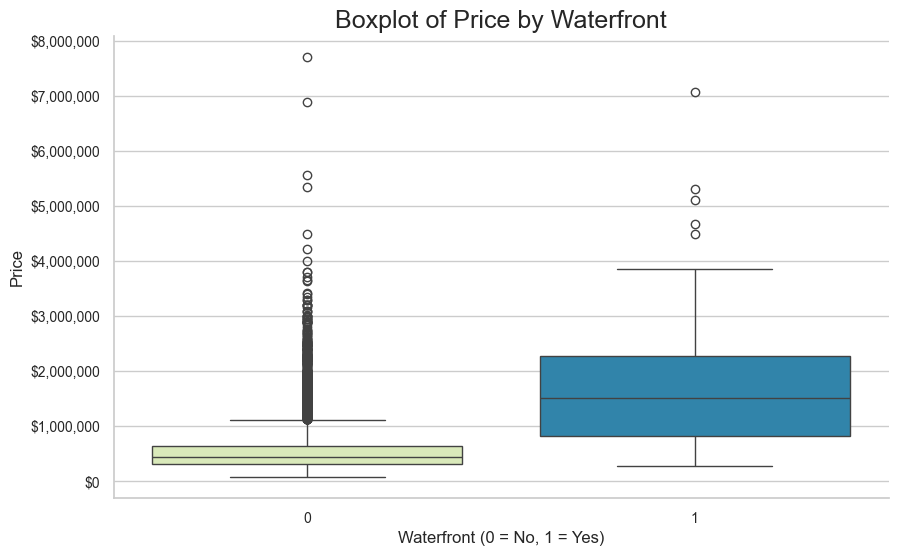

In [33]:
# Creating a boxplot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Farben definieren
df_filtered_waterfront['waterfront'] = df_filtered_waterfront['waterfront'].astype(str)
palette = {"0": "#dcf1b2", "1": "#1d8cbe"}

# Boxplot mit angepassten Farben
sns.boxplot(x='waterfront', y='price', data=df_filtered_waterfront, palette=palette)

# Schriftart und Achsenanpassungen
plt.xlabel('Waterfront (0 = No, 1 = Yes)', fontsize=12, fontname='Arial')
plt.ylabel('Price', fontsize=12, fontname='Arial')
plt.title('Boxplot of Price by Waterfront', fontsize=18, fontname='Arial')
plt.xticks(fontsize=10, fontname='Arial')
plt.yticks(fontsize=10, fontname='Arial')

# Ränder der gesamten Grafik rechts und oben entfernen
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# Y-Achse Formatierung
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))

# Plot anzeigen
plt.show()